In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [26]:
# Reading the dataset
ds = pd.read_csv(r'C:\Users\ensar\Downloads\car_evaluation.csv', delimiter = ',')

In [27]:
ds.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [28]:
# Checking whether null values are present
ds.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [29]:
# Assign names to Columns
ds.columns = ['buying','maint','doors','persons','lug_boot','safety','classes']

In [30]:
ds.buying.unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [31]:
ds.maint.unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [32]:
ds.doors.unique()

array(['2', '3', '4', '5more'], dtype=object)

In [33]:
ds.persons.unique()

array(['2', '4', 'more'], dtype=object)

In [34]:
ds.lug_boot.unique()

array(['small', 'med', 'big'], dtype=object)

In [35]:
ds.safety.unique()

array(['low', 'med', 'high'], dtype=object)

In [36]:
ds.classes.unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [37]:
# From the above we can see all the columns are non-numeric & categorical
# Hence Encode Data

ds.buying.replace(('vhigh','high','med','low'),(1,2,3,4), inplace=True)
ds.maint.replace(('vhigh','high','med','low'),(1,2,3,4), inplace=True)
ds.doors.replace(('2','3','4','5more'),(1,2,3,4), inplace=True)
ds.persons.replace(('2','4','more'),(1,2,3), inplace=True)
ds.lug_boot.replace(('small','med','big'),(1,2,3), inplace=True)
ds.safety.replace(('low','med','high'),(1,2,3), inplace=True)
ds.classes.replace(('unacc','acc','good','vgood'),(1,2,3,4), inplace=True)

In [38]:
ds.shape

(1728, 7)

In [39]:
ds.head()

,buying,maint,doors,persons,lug_boot,safety,classes
0,1,1,1,1,1,1,1
1,1,1,1,1,1,2,1
2,1,1,1,1,1,3,1
3,1,1,1,1,2,1,1
4,1,1,1,1,2,2,1


(array([1210.,    0.,    0.,  384.,    0.,    0.,   69.,    0.,    0.,
          65.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

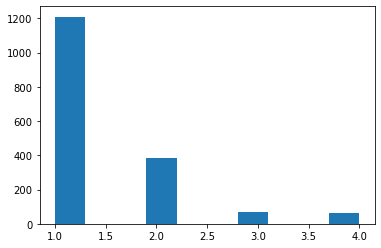

In [40]:
plt.hist((ds.classes))

array([[<AxesSubplot:title={'center':'buying'}>,
        <AxesSubplot:title={'center':'maint'}>,
        <AxesSubplot:title={'center':'doors'}>],
       [<AxesSubplot:title={'center':'persons'}>,
        <AxesSubplot:title={'center':'lug_boot'}>,
        <AxesSubplot:title={'center':'safety'}>],
       [<AxesSubplot:title={'center':'classes'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

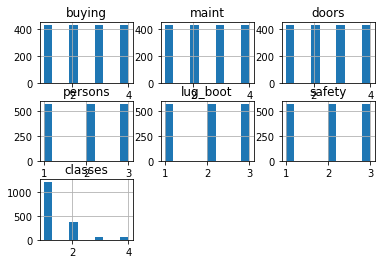

In [41]:
ds.hist()

In [42]:
X=ds[ds.columns[:-1]]
Y=ds['classes']

In [43]:
X.head(2)

,buying,maint,doors,persons,lug_boot,safety
0,1,1,1,1,1,1
1,1,1,1,1,1,2


In [44]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.3,random_state=42)

In [47]:
# Applying KNN Classifier

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_jobs=-1)

In [49]:
knn.fit(xtrain,ytrain)
pred=knn.predict(xtest)
knn.score(xtest,ytest)

0.9152215799614644

In [57]:
from sklearn.metrics import classification_report
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           1       0.95      0.99      0.97       358
           2       0.85      0.81      0.83       118
           3       0.65      0.58      0.61        19
           4       0.87      0.54      0.67        24

    accuracy                           0.92       519
   macro avg       0.83      0.73      0.77       519
weighted avg       0.91      0.92      0.91       519



In [52]:
# Applying Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

rfc=RandomForestClassifier(n_jobs=-1,random_state=51)

In [55]:
rfc.fit(xtrain,ytrain)
rf_pred = rfc.predict(xtest)
print(rfc.score(xtest,ytest))
print(f1_score(ytest,rfc.predict(xtest),average='macro'))

0.9595375722543352
0.9013772737189931


In [58]:
print(classification_report(ytest,rf_pred))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99       358
           2       0.93      0.90      0.91       118
           3       0.77      0.89      0.83        19
           4       0.88      0.88      0.88        24

    accuracy                           0.96       519
   macro avg       0.89      0.91      0.90       519
weighted avg       0.96      0.96      0.96       519



In [59]:
# Applying Logistic Regression for classification
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression()
logReg.fit(xtrain,ytrain)

C:\Users\ensar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
lr_pred = logReg.predict(xtest)

In [63]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,lr_pred)

array([[333,  18,   3,   4],
       [ 47,  68,   2,   1],
       [  1,   9,   8,   1],
       [  0,   6,   2,  16]], dtype=int64)

In [66]:
print(logReg.score(xtest,ytest))
print(f1_score(ytest,logReg.predict(xtest),average='macro'))

0.8188824662813102
0.6721157093482124


In [67]:
print(classification_report(ytest,lr_pred))

              precision    recall  f1-score   support

           1       0.87      0.93      0.90       358
           2       0.67      0.58      0.62       118
           3       0.53      0.42      0.47        19
           4       0.73      0.67      0.70        24

    accuracy                           0.82       519
   macro avg       0.70      0.65      0.67       519
weighted avg       0.81      0.82      0.81       519



In [ ]:
# Insights
#----------
# RFC is providing more Accuracy - 96%
# Knn - 92%
# Logistic Regression - 82%